In [1]:
#import all library required
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
mpl.style.use("seaborn-darkgrid")


In [ ]:

#import all keras library component 
from tensorflow.keras.layers import (
    Input,
    Conv2D, 
    MaxPool2D, 
    Dense, 
    BatchNormalization, 
    ReLU, 
    Dropout, 
    Flatten,
    Dropout,
    Concatenate,
    GlobalAvgPool2D
)
from tensorflow.keras.regularizers import L2

In [ ]:
#upload image train (csv) 
from google.colab import files
files.upload()

In [5]:
# upload data coodinate of keypoint
from google.colab import files
files.upload()

Saving mat_truoc_pt-enrich.csv to mat_truoc_pt-enrich.csv


{'mat_truoc_pt-enrich.csv': b'15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,21x,21y\r\n53,44,53,54,53,58,53,64,64,67,54,71,43,68\r\n46,35,46,41,46,44,46,47,53,49,46,51,39,48\r\n49,38,49,44,49,47,49,50,56,51,49,54,43,51\r\n47,41,47,49,47,51,47,54,53,55,47,57,40,55\r\n48,42,48,49,47,53,47,56,53,56,47,58,41,56\r\n45,39,45,44,45,47,45,50,52,51,46,54,40,51\r\n44,38,45,45,45,48,45,51,51,51,46,54,40,52\r\n46,42,47,48,47,52,47,55,56,55,48,58,43,57\r\n51,44,52,50,52,53,52,57,61,56,53,60,48,57\r\n51,36,51,41,51,44,51,47,58,49,52,51,45,49\r\n51,36,52,42,52,45,52,48,59,50,52,52,45,50\r\n50,39,50,45,50,49,50,52,56,53,50,55,43,53\r\n49,39,49,46,49,49,48,52,55,53,48,55,42,53\r\n48,38,48,44,48,47,48,50,55,52,48,53,43,51\r\n48,38,48,43,48,46,48,49,55,50,48,53,42,50\r\n60,21,60,34,60,38,60,43,71,46,60,49,49,45\r\n46,39,46,46,46,50,46,54,52,55,46,58,39,54\r\n51,40,51,47,51,51,51,55,57,55,51,58,44,55\r\n49,35,49,41,49,44,50,47,56,48,50,50,44,48\r\n50,36,50,41,50,44,50,47,56,48,50,50,44,48\r\n54,32,54,37

In [6]:
#read train data, and analysis
# df_train=pd.read_csv("train.csv")
df_train=pd.read_csv("mat_truoc_pt-enrich.csv")

In [3]:
#read img data, and analysis
# df_img=pd.read_csv("Img.zip")
df_img=pd.read_csv("Img_font-enrich.zip")
print(df_img)

     Col  Col.1  Col.2  Col.3  Col.4  Col.5  Col.6  Col.7  Col.8  Col.9  ...  \
0    246    246    246    246    246    246    246    246    247    241  ...   
1     64     65     65     65     65     65     65     65     65     65  ...   
2     66     66     66     66     66     66     67     67     66     66  ...   
3     70     70     69     70     70     69     70     70     70     70  ...   
4     68     68     68     68     68     68     68     68     68     68  ...   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
743  215    216    215    214    214    215    215    215    215    215  ...   
744  225    224    222    223    224    224    223    223    219    220  ...   
745    0      0      0      0      0      0      0      0      0      0  ...   
746    0      0      0      0      0      0      0      0      0      0  ...   
747  239    239    238    236    236    235    235    235    235    236  ...   

     Col.9206  Col.9207  Col.9208  Col.

In [7]:
# mere mutil value colmn values to one
df_img['Image'] = df_img[df_img.columns[0:]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)
print("Modified DataFrame:\n",df_img["Image"])
# print(df_img.head())

Modified DataFrame:
 0      246 246 246 246 246 246 246 246 247 241 230 22...
1      64 65 65 65 65 65 65 65 65 65 65 65 65 65 65 6...
2      66 66 66 66 66 66 67 67 66 66 66 67 67 66 67 6...
3      70 70 69 70 70 69 70 70 70 70 70 70 70 70 70 6...
4      68 68 68 68 68 68 68 68 68 68 68 68 69 68 68 6...
                             ...                        
743    215 216 215 214 214 215 215 215 215 215 216 21...
744    225 224 222 223 224 224 223 223 219 220 224 22...
745    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
746    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
747    239 239 238 236 236 235 235 235 235 236 238 23...
Name: Image, Length: 748, dtype: object


In [ ]:
df_img.head(1)

,Col,Col.1,Col.2,Col.3,Col.4,Col.5,Col.6,Col.7,Col.8,Col.9,...,Col.9207,Col.9208,Col.9209,Col.9210,Col.9211,Col.9212,Col.9213,Col.9214,Col.9215,Image
0,246,246,246,246,246,246,246,246,247,241,...,242,242,242,243,242,242,242,242,242,246 246 246 246 246 246 246 246 247 241 230 22...


In [ ]:
df_train.head(3)
#dataset consist of 30 feature (x and y coordinate ) and image array

,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,21x,21y
0,53,44,53,54,53,58,53,64,64,67,54,71,43,68
1,46,35,46,41,46,44,46,47,53,49,46,51,39,48
2,49,38,49,44,49,47,49,50,56,51,49,54,43,51


In [8]:
# define feature and target columns
feature_col,target_col="Image",list(df_train.columns)

In [ ]:
# replace NaN with mean  
# if found Nan replace
# df_train[target_col] = df_train[target_col].fillna(df_train[target_col].mean())
df_train.info()
print(df_train)

In [ ]:
# target_col # total 14 target (x,y coordinate)

In [9]:
# define width and height of image
IMG_WIDTH=96
IMG_HEIGHT=96
IMG_CANNELS=1 # grayscale image
## split image and label  #image
images=np.array(df_img[feature_col].str.split().tolist(),dtype="float").reshape(-1,IMG_HEIGHT,IMG_WIDTH,IMG_CANNELS)
# print(images)
labels=df_train[target_col].to_numpy()

In [10]:
print(images[0].shape)
# scale image from 0 -255 to 0-1 for better training
scaled_images=images/255.0

(96, 96, 1)


In [11]:
print(labels)
print(labels.shape)

[[53 44 53 ... 71 43 68]
 [46 35 46 ... 51 39 48]
 [49 38 49 ... 54 43 51]
 ...
 [51 17 51 ... 36 43 33]
 [51 17 51 ... 36 43 34]
 [53 24 53 ... 44 45 41]]
(748, 14)


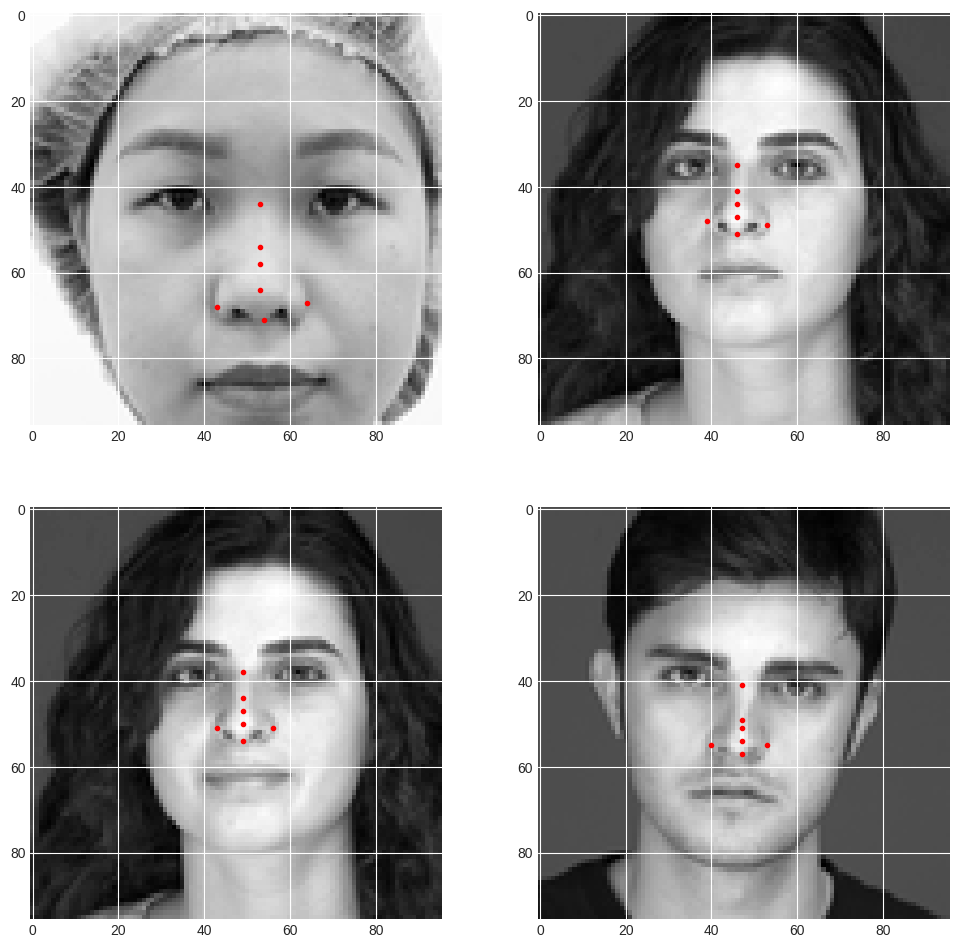

In [14]:
# Show img and key points. SHOW multil imgage
# df_train=pd.read_csv("train.csv")
# df_train=pd.read_csv("mat_truoc.csv")
df_train.head()
fig, ax = plt.subplots(2,2,figsize = (12,12), dpi = 100)
axes = ax.ravel()
for idx,ax  in enumerate(axes):
    ax.imshow(images[idx].reshape(96,96),cmap='gray')
    photo_visualize_pnts = df_train.iloc[idx].values
    ax.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='.')
fig.show()


In [15]:
# spliting training dataset for training, validation, test
# shuffle dataset before spliting with randam state of 7
train_images,valid_images,train_labels,valid_labels=train_test_split(scaled_images,labels,test_size=0.1,random_state=7)
train_images,test_images,train_labels,test_labels=train_test_split(train_images,train_labels, test_size=0.1,random_state=7)


In [16]:
print(" số lượng train img là: ", train_images.shape)
print(" số lượng test img là: ",test_images.shape)
print(" số lượng valid là: ",valid_images.shape)

 số lượng train img là:  (605, 96, 96, 1)
 số lượng test img là:  (68, 96, 96, 1)
 số lượng valid là:  (75, 96, 96, 1)


In [53]:
# Let's start with model
# We will create CNN model that uses Inception Architecture
def inception_module(inputs,f1,f2):
    # defining convolution 2d layer 
    x1=Conv2D(f1,3,padding="same")(inputs)
    # batchnormalize the x1
    x1=BatchNormalization()(x1)
    x1=ReLU()(x1)   
    # it was f1 change it to f2 
    x2=Conv2D(f2,5,padding="same")(inputs)
    # batchnormalize the x1
    x2=BatchNormalization()(x2)
    x2=ReLU()(x2)
    # combine x1 and x2
    return Concatenate()([x1,x2])
    

In [54]:
def build_model():
    inputs = Input((96, 96, 1))
    x = inception_module(inputs, 64,  32)
    x = MaxPool2D()(x)
    x = inception_module(x, 64,  32)
    x = MaxPool2D()(x)
    x = inception_module(x, 128, 32)
    x = MaxPool2D()(x)
    x = inception_module(x, 128, 32)
    x = MaxPool2D()(x)
    x = inception_module(x, 256, 64)
    x = MaxPool2D()(x)
    x = Flatten()(x)
    x = Dense(1024, kernel_regularizer=L2(l2=0.05))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dense(512, kernel_regularizer=L2(l2=0.02))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dense(128, kernel_regularizer=L2(l2=0.01))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    ## train wwith 7 points
    x = Dense(14)(x)
    
    model = tf.keras.Model(inputs, outputs=x)
    return model

model = build_model()
# model.summary()
from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [55]:
#compile model 
# def custom_mean_squared_error(y_true, y_pred):
# return tf.math.reduce_mean(tf.sqrt.square(y_true - y_pred))
# you can change this value to get better accuracy
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [56]:
# creating a chechpoint to save model at best accuarcy
ckp_path="trained_model/model"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,
                                                   monitor="val_mae",
                                                   mode="auto",
                                                   save_best_only=True,
                                                   save_weights_only=True)

In [59]:
# create a lr reducer which decrease learning rate when accuarcy does not increase
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,monitor="val_mae",
                                             mode="auto",cooldown=0,
                                             patience=10,verbose=1,min_lr=1e-10)
# patience : wait till 5 epoch
# verbose : show accuracy every 1 epoch
# min_lr=minimum learning rate
#

In [22]:
print(train_labels)
print(train_labels.shape)

[[42 35 42 ... 52 35 49]
 [42 32 42 ... 52 33 49]
 [48 37 48 ... 59 40 56]
 ...
 [46 42 46 ... 57 40 56]
 [43 25 43 ... 45 35 42]
 [46 38 46 ... 55 39 54]]
(605, 14)


In [60]:
# Training model
EPOCHS= 700
BATCH_SIZE= 32
history=model.fit(train_images,
                 train_labels,
                 validation_data=(valid_images,valid_labels),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr]
                 )
# found the error
# we are getting NaN value in training because there is NaN in train set

Epoch 1/700
19/19 [==============================] - 3s 95ms/step - loss: 2.6870 - mae: 0.9488 - val_loss: 7.9818 - val_mae: 1.4969 - lr: 3.0433e-06
Epoch 2/700
19/19 [==============================] - 1s 54ms/step - loss: 2.3697 - mae: 0.8266 - val_loss: 7.9981 - val_mae: 1.4965 - lr: 3.0433e-06
Epoch 3/700
19/19 [==============================] - 1s 57ms/step - loss: 2.5408 - mae: 0.8823 - val_loss: 7.9950 - val_mae: 1.4930 - lr: 3.0433e-06
Epoch 4/700
19/19 [==============================] - 1s 48ms/step - loss: 2.2872 - mae: 0.8035 - val_loss: 8.0105 - val_mae: 1.4935 - lr: 3.0433e-06
Epoch 5/700
19/19 [==============================] - 1s 47ms/step - loss: 2.5640 - mae: 0.8901 - val_loss: 8.0233 - val_mae: 1.4948 - lr: 3.0433e-06
Epoch 6/700
19/19 [==============================] - 1s 49ms/step - loss: 2.4549 - mae: 0.8598 - val_loss: 8.0355 - val_mae: 1.4948 - lr: 3.0433e-06
Epoch 7/700
19/19 [==============================] - 1s 48ms/step - loss: 2.1815 - mae: 0.7559 - val_loss:

In [ ]:
# now  training is working properly

In [ ]:
# I will see you when training is finish

In [24]:
#now the training is finished load best model from check point
model.load_weights(ckp_path)

In [25]:
# now save the model in tflite formate
#converter that convert tf to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [38]:
# predict on test data
prediction_test_img=model.predict(test_images,batch_size=1)

68/68 [==============================] - 1s 6ms/step


In [27]:

print(prediction_test_img.shape)

(68, 14)


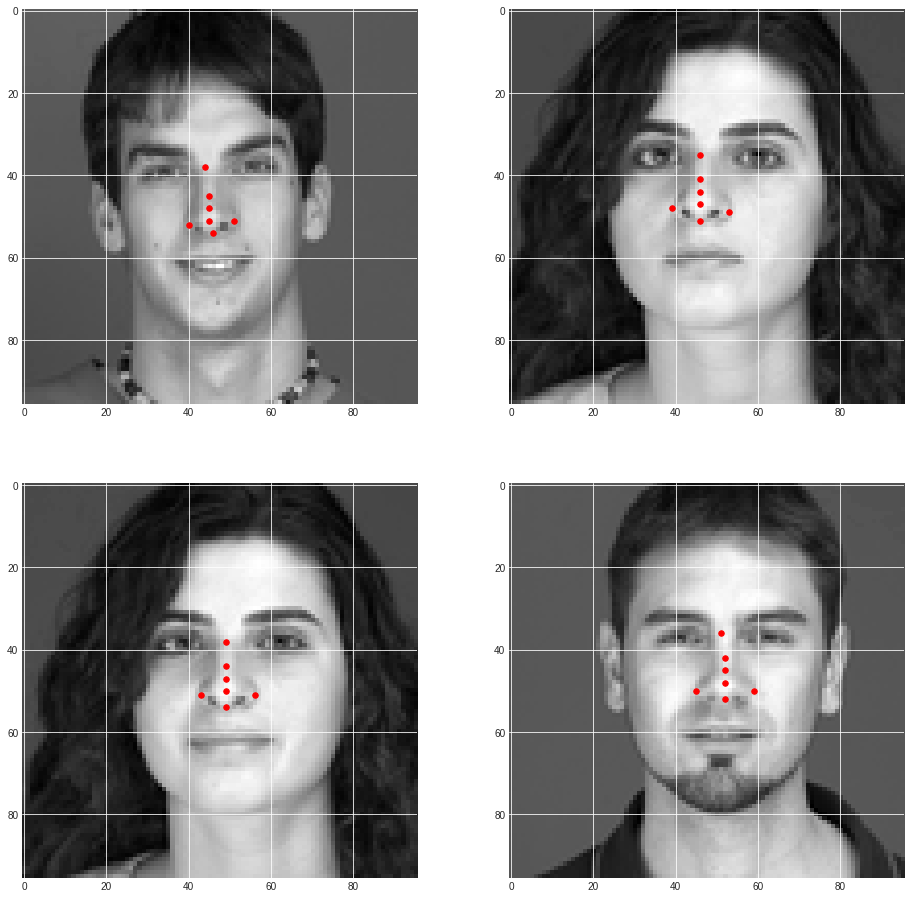

In [30]:
# let's make a function to show training dataset visual
def show_examples(images, landmarks):
  # make a figure consist of 16 images
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
    # looping through each image
    for img, marks, ax in zip(images, landmarks, axes.ravel()):
        # Keypoints
        # every odd values are x coordinate
        # every even values are y coodinate
        x_points = marks[:: 2]
        y_points = marks[1::2]
        
        # display on figure 
        ax.imshow(img.squeeze(), cmap='gray')
        ax.scatter(x_points, y_points, s=30, color='red')
    
    plt.show()

idx = np.random.choice(16, 16)
show_examples(images[idx], labels[idx])

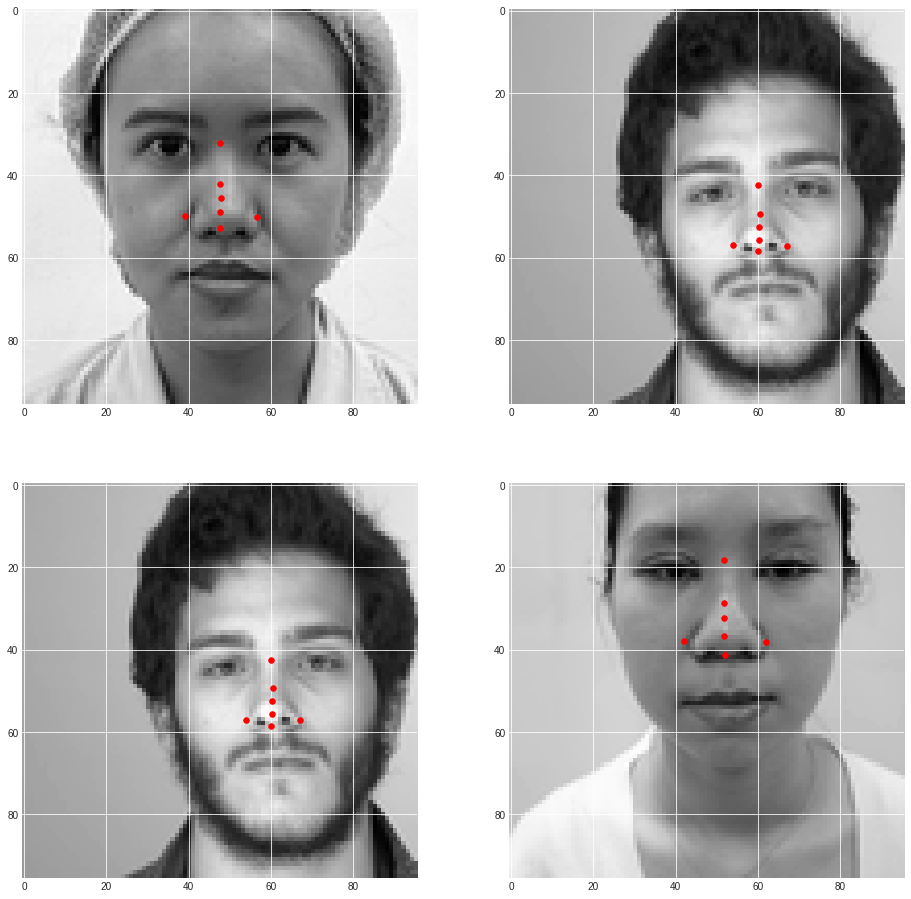

In [43]:
# Visualize test img spit from train data before train
idx=np.random.choice(16,16)
show_examples(test_images[idx]*255,prediction_test_img[idx])